# Exploring reddit data using Spark

This notebook provides startup code for downloading Reddit data from the Azure Blob Storage bucket specifically setup for this project.   
_<b>Make sure you are running this notebook on a cluster which has the credentials setup to access Azure Blob Storage, otherwise this notebook will not be able to read the data!</b>_

_<b>Make sure you are using DataBricks Runtime 11.3 or newer otherwise you will not be able to save any new files in this repository!</b>_

The dataset for this notebook is described in [The Pushshift Reddit Dataset](https://arxiv.org/pdf/2001.08435.pdf) paper.

# Instruction
YouTube and Twitch: The online video heavyweight battle of the century.

While there are many similarities between Twitch and YouTube - for example, they are both audio/video sharing platforms - there are also many differences between the two platforms.

The most significant difference between Twitch and YouTube is the viewer's interest. Twitch caters to live-stream hosts and is the largest live-streaming platform in the world. On the other hand, YouTube uses an excellent search engine to help those interested in a specific topic find videos that match their heart's expectations.

While the two video sites have different focuses, they also have similar modules. YouTube, for example, has a live streaming system, while Twitch is also drawing on more different categories of video submissions.

This study examines the difference in users' focus using these two video platforms by comparing two different subreddit statements on Reddit, 'youtube' and 'Twitch'.

## Propose 10 different avenues of analysis for your data.

### 1. What is the total performance of users’ comments on Twitch and Youtube in recent 2 years?
##### Business Goal: 
Python and Spark would be the primary programming languages used to compare the total comments analysis between Twitch and Youtube users. By doing this, readers can therefore get an overview of the total users activities between these two social media platforms from 2021/01/01 to 2022/08/31. 
##### Technical Proposal：
Technically, packages of seaborn and matplotlib would be adapted to vividly show visualizations. The new datasets of ‘submissions_twitch’, ‘submissions_youtube’ are generated based on 15 variables such as ‘author_id’, ‘title’, and so on. Two bar plots would therefore be generated with the columns of ‘num_comments’ in these two new datasets. 

### 2. What’s the Time series patterns of comments number. Based on Q1 
##### Business Goal: 
To define time series patterns for Twitch comments and Youtube comments. 
##### Technical Proposal: 
Use “plotly” to do line plots based on date and ‘num_comments’, and combine the Twitch plots with Youtube plots. Find whether there are the same patterns between Twitch comments and Youtube comments. Then analyze the user activity behavior. And try to track the influence of those big news (some may match with the summits in plots) 


### 3. What’s the relationship between length of comments and “score”(upvote-downvote)?
##### Business Goal: 
Determine if long comments could represent high quality comments somehow. 
##### Technical Proposal: 
Create a new column called “body_length”, which saves numeric data representing the length of comments. Create a scatter plot that compares the body_length and score. (Here we define that a high quality comment doesn't  have to be right or receive a positive score, instead as long as it could activate people to give responses and even write down sub-comments. Thus a very low negative score also can be considered a high quality comments. )

### 4. What’s the ratio of having outer links in Youtube and Twitch? Are comments with an outer link are more likely to have a higher score?
##### Business Goal: 
Determine whether having outer links means giving higher quality comments. And analyze the outer links ratio in these two platforms.
##### Technical Proposal: 
Choose “is_self” as a new feature. Generate two pie charts for the ratio of having outer links in Youtube and Twitch, and then compare and analyze the result. Build another viz that contains the information of “is_self” and “score”, find whether these two features have any correlation to each other.

### 5. What’s the hottest topics in Youtube and Twitch Reddits?
##### Business goal: 
To define the most popular topics for Youtube and Twitch lovers. Dive deeper into user hobbies in social media.
##### Technical Proposal: 
Select the “body” column in “comments_youtube” and “comments_twitch” table, use “Wordcloud”, “matplotlib”, “pandas'' to generate word clouds and word frequency lists for Youtube and Twitch comments. Implement key words analysis. Compare their word clouds viz and frequency lists, and find their differences and similarities.

### 6. What are the top 10 qualified topics that users agree most for both Youtube and Twitch? Based on Q5. 
##### Business Goal: 
The goal is to discover the topic for youtube and twitch which receive the top 10 of reviewing scores correspondingly. This would reflect the users’ acceptance level for each topic. Python and Spark would be the primary programming languages used for this business goal. 
##### Technical Proposal: 
The column of ‘score’ from the submissions_youtube and submissions_twitch would be used. Since the score column is created by subtracting the downvotes from upvotes, the scores would be balanced to 0 if the topic is too controversial or not influential at all. The quantitative analysis would be conducted to filter topics with the top 10 highest reviewing scores. 

### 7. What are the similarities and differences of the topic that is detected over 18 or below 18 on twitch and youtube? Based on Q5.
##### Business Goal: 
The goal is to discover the insights of the functions of platforms that users care about based on whether the comment is over 18 or not. The programming languages would be Spark and Python. 
##### Technical Proposal: 
Based on the business goal of getting the most popular topic based on users’ ages. The NLP tool of Text Classification analysis can be conducted. For plotting, the table of ‘submissions_twitch’ and ‘‘submissions_youtube’ and column of ‘over_18’ would be used; the machine learning methods of decision trees might also 
used to classify the content that a specific topic has the most. 

### 8. How to help the company predict the future over-18 comments and posts? Based on Q7.
##### Business Goal: 
The goal is to improve the overall quality of the subreddit platform, and therefore, improve the efficiency for administrators when dealing with posts. The programming languages used would be Python and Spark. 
##### Technical Proposal: 
The table of ‘submissions_twitch’ and ‘submissions_youtube’ would be used. And the columns of ‘title’, ‘selftext’, and ‘over_18’ can be used. Since titles are all text data, the method of vectorization should be applied first. Then, the training and testing dataset would be splitted for doing the predictive models. For prediction, the NLP model of text prediction can be used to help the administrator automatically determine if the text is over-18 and needs to be deleted. 

### 9. Sentiments analysis for Youtube and Twitch Reddits? Based on Q5.
##### Business Goal: 
Analyze redditers’ sentiments score and make comparison between these two video based platforms.
##### Technical Proposal: 
Apply “nltk” package in the “body” column to perform data tokenization, lementization, stopword removal. Pretrained models will be used to inference text sentiment. Comparisons based on sentiment and interactive features including scores and number of comments will be drawn.

### 10. Provide a list of technical problems, what is the frequency that users have on these technical problems of each platform? / Any suggestions for twitch and youtube to improve based on users’ post? 
##### Business Goal: 
The goal of this business question is to help twitch and youtube discover the most frequent problems that users meet, and help them to improve the user experience. The programming language used for this question would be Python and Spark. 
##### Technical Proposal: 
In order to filter the topics, a list of technical problems such as ‘appcrash’ and ‘server collapse’ needs to be collected first. TFIDF would be used to deal with the text data.  After cleaning the dataset, the NLP method of Keyword Extraction can be conducted to extract the topic word and fit the problems to posts.

## Read Data From DBFS

### Submission Data

In [0]:
submissions_new=spark.read.parquet("/FileStore/data/submissions_new.parquet")
submissions_new.show()

+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+---------+
|    id|author_id|subreddit|               title|            selftext|num_crossposts|num_comments|is_self|is_video|is_crosspostable|over_18|promoted|stickied|score|created_utc|score_dummy|title_dummy|len_title|
+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+---------+
|qw75mm|     null|   Twitch|Streams I watch h...|For a time I thou...|             0|           0|   true|   false|            true|  false|    null|   false|    1| 11/17/2021|          1|          0|       83|
|qw774i|     null|   Twitch|So I just started...|           [removed]|             0|          10|   true|   false|           false|  false|    null|   fals

In [0]:
submissions_new.count()

Out[155]: 260827

In [0]:
submissions_nona = submissions_new.filter(~submissions_new["title"].rlike("\[deleted by user\]"))

In [0]:
submissions_nona = submissions_nona.filter(~submissions_nona["selftext"].rlike("\[removed\]"))

In [0]:
submissions_nona.show()

+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+---------+
|    id|author_id|subreddit|               title|            selftext|num_crossposts|num_comments|is_self|is_video|is_crosspostable|over_18|promoted|stickied|score|created_utc|score_dummy|title_dummy|len_title|
+------+---------+---------+--------------------+--------------------+--------------+------------+-------+--------+----------------+-------+--------+--------+-----+-----------+-----------+-----------+---------+
|qw75mm|     null|   Twitch|Streams I watch h...|For a time I thou...|             0|           0|   true|   false|            true|  false|    null|   false|    1| 11/17/2021|          1|          0|       83|
|qw7j0b|     null|   Twitch|My boyfriend just...|                    |             0|           1|  false|   false|           false|  false|    null|   fals

In [0]:
submissions_nona.count()

Out[179]: 174929

In [0]:
# dbutils.fs.rm("/FileStore/data/submissions_nona.parquet", True)

Out[170]: True

In [0]:
submissions_nona.write.parquet("/FileStore/data/submissions_nona.parquet") 

In [0]:
submissions_nona =spark.read.parquet("/FileStore/data/submissions_nona.parquet")

### Comments Data

In [0]:
import pyspark.sql.functions as f

In [0]:
comments =spark.read.parquet("/FileStore/data/comments_all.parquet")

In [0]:
comments = comments.withColumn('created_utc', f.from_unixtime("created_utc", "MM/dd/yyyy"))

### Remove the comments that has been deleted and NA value

In [0]:
comments_nona = comments.filter(~comments["body"].rlike("ed\]"))

In [0]:
comments_nona = comments_nona.na.drop(subset=["body"])

In [0]:
comments_nona.show()

+-------+---------+-----------------+--------------------+-----+-----------+---------+
|     id|  link_id|           author|                body|score|created_utc|subreddit|
+-------+---------+-----------------+--------------------+-----+-----------+---------+
|he1xe2z|t3_ptu46x|      SenpaiKira2|here's soap, wash...|  -10| 09/24/2021|  youtube|
|he1xx74|t3_ptu46x|        Techestro|Just uninstall yo...|   11| 09/24/2021|  youtube|
|he1ydyf|t3_puce9m|    AutoModerator|Sorry Limp-Sun140...|    1| 09/24/2021|  youtube|
|he1yxa9|t3_pu40rj|     AUSTINguy0oo|Isn’t YouTube 13 ...|    3| 09/24/2021|  youtube|
|he1z5e6|t3_puav5y|     AUSTINguy0oo|They’ve done it t...|    1| 09/24/2021|  youtube|
|he1z83e|t3_pub8ed|Far_Butterfly5501|Personalized or N...|    3| 09/24/2021|  youtube|
|he1zcg6|t3_pu8j62|         LOL_WhyT|Opera GX lets you...|    3| 09/24/2021|  youtube|
|h88gbak|t3_p0i1nf|       w3y3vrn_BB|They were talking...|   21| 08/09/2021|  youtube|
|h88gjtj|t3_p0r6ov|    AutoModerator|Hi Old

In [0]:
comments_nona.count()

Out[167]: 948783

In [0]:
# dbutils.fs.rm("/FileStore/data/comments_nona.parquet", True)

Out[168]: True

In [0]:
comments_nona.write.parquet("/FileStore/data/comments_nona.parquet") 

#EDA

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## EDA1: Number of Submissions in these two subreddit(bar chart)

In [0]:
number_sub = submissions_nona.groupby('subreddit').count()
number_sub.show()

+---------+------+
|subreddit| count|
+---------+------+
|   Twitch| 68034|
|  youtube|106895|
+---------+------+



In [0]:
df_numbersub = number_sub.cache().toPandas()
df_numbersub

,subreddit,count
0,youtube,106895
1,Twitch,68034


There are 163,584 youtube and 97,243 Twitch submissions. The bar plot clearly shows the difference between the popularity of submissions in these two subreddits.

<Figure size 720x576 with 0 Axes>

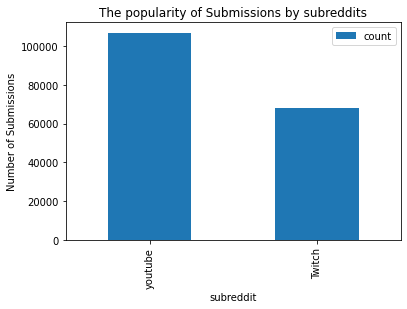

In [0]:
plt.figure(figsize=(10, 8))
df_numbersub.plot.bar(x='subreddit', y='count') 
plt.title("The popularity of Submissions by subreddits")
plt.ylabel("Number of Submissions") 
plt.show()

The bar plot shows the polulation of submissions in these two different subreddit. It is obvious that youtube had more submission then Twitch from January 1, 2021 to Auguest 21, 2022.

## Comparing Trend of Submission Activities with Parent Company Stock Price

In [0]:
number_sub_byday = submissions_new.groupby("created_utc", "subreddit").count().toPandas()

In [0]:
number_sub_byday["created_utc"] = pd.to_datetime(number_sub_byday["created_utc"])

In [0]:
stock_GOOG = pd.read_csv("/dbfs/FileStore/data/GOOG.csv")

In [0]:
stock_AMZN = pd.read_csv("/dbfs/FileStore/data/AMZN.csv")

In [0]:
stock = stock_GOOG[["Date", "Adj Close"]]
stock.columns = ["Date", "GOOG"]

In [0]:
stock = stock.merge(stock_AMZN[["Date", "Adj Close"]], on="Date")

In [0]:
stock.columns = ["Date", "GOOG", "AMZN"]
stock["Date"] = pd.to_datetime(stock["Date"])

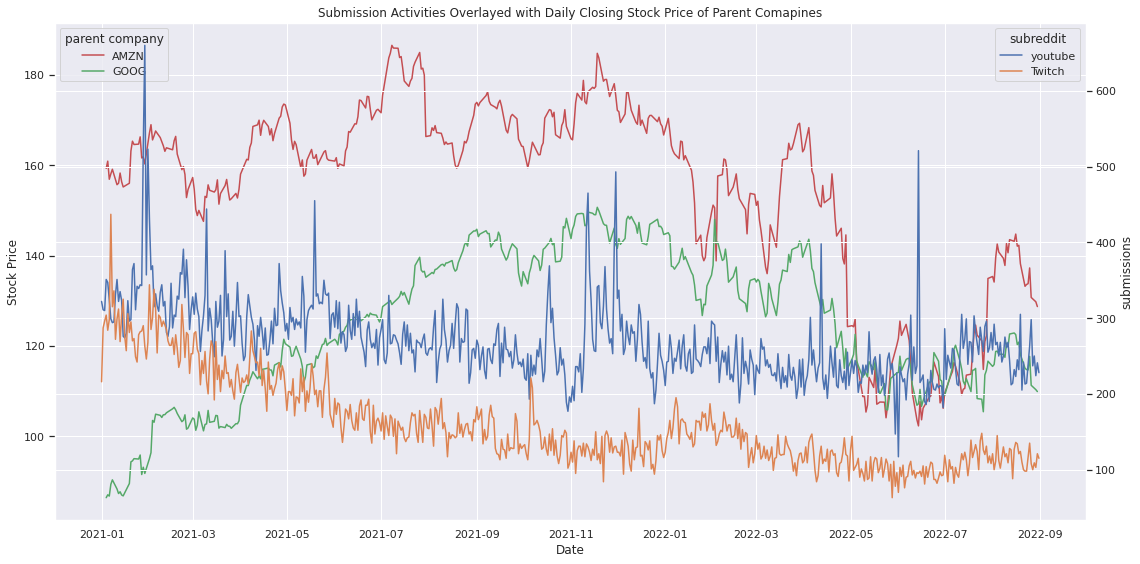

In [0]:
fig, axes = plt.subplots(figsize=(16,8))
sns.set_theme(style='darkgrid')  # 'whitegrid', 'dark', 'white', 'ticks'
ax1 = sns.lineplot(x = 'Date',
                   y = 'AMZN',
                   label = 'AMZN',
                   color = 'r',
                   data = stock).set(title='Submission Activities Overlayed with Daily Closing Stock Price of Parent Comapines', ylabel='Stock Price')
ax2 = sns.lineplot(x = 'Date',
                   y = 'GOOG',
                   label = 'GOOG',
                   color = 'g',
                   data = stock)
plt.legend(title='parent company', loc='upper left')
ax3 = plt.twinx()
sns.lineplot(x='created_utc',
             y='count',
             hue='subreddit',
             data=number_sub_byday).set(ylabel='submissions')

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

After coverting the 'created_utc' column to datetime, we plotted the number of submissions for each subreddit per day. We can see that overall the daily activities for both subreddits are declining over the past two years. For most of times YouTube subreddit have more daily submissions then Twitch subreddit, while occasional spikes for YouTube are more significant, usually indicating a service interruption (which will be discussed later). The stock price time plot for the parent company of both platforms are included in the following chunks for reference. It shows that the overall trend of the submission activities in these two subreddits does not reflect the stock price of the two companies, certain “pikes” in the capital market does correlates with more discussions on reddit.

#NLP

In [0]:
from pyspark.sql import SparkSession
from sparknlp.pretrained import PretrainedPipeline
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
import pyspark.sql.functions as f
from pyspark.ml.feature import CountVectorizer, IDF, HashingTF, SQLTransformer
# Start Spark Session with Spark NLP
# spark = sparknlp.start()

In [0]:
# Start Spark Session with Spark NLP
spark = SparkSession.builder \
        .appName("SparkNLP") \
        .config("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
        .config("spark.jars.packages", "com.johnsnowlabs.nlp:spark-nlp_2.12:4.2.1") \
    .master('yarn') \
    .getOrCreate()

In [0]:
spark

SparkSession - hive 
 
 
 SparkContext 

 Spark UI 

 
 Version 
 v3.3.0 
 Master 
 spark://10.139.64.5:7077 
 AppName 
 Databricks Shell

##  Basic Data Text Checks

### Clean your text data
stop words, stemming, lemmatizing, removing unusual characters, matching synonyms, etc (at least 5)

In [0]:
def nlp_pipline(input_colname, input_df, tokenize=True, normalize=True, lemmatize=True, stemming=False, stopwords=True, tf=False, idf=False, vivekn=False, Word2Vec=False, finisher=True, embed_finisher=False):
    documentAssembler = DocumentAssembler().setInputCol(input_colname).setOutputCol("document")
#     num_outputs = sum([tokenize, normalize, lemmatize, stopwords, vivekn, finisher])
    pipline_used = [documentAssembler]
    i = 0
    if tokenize:
        tokenizer = Tokenizer().setInputCols(["document"]).setOutputCol('output' + str(i+1))
        i += 1
        pipline_used.append(tokenizer)
    if normalize:
        normalizer = Normalizer().setInputCols(['output' + str(i)]).setOutputCol('output' + str(i+1)).setLowercase(True).setCleanupPatterns(["""[^\w\d\s]"""]) 
        pipline_used.append(normalizer)
        i += 1
    if lemmatize:
        lemmatizer = LemmatizerModel.pretrained().setInputCols('output' + str(i)).setOutputCol('output' + str(i+1))
        pipline_used.append(lemmatizer)
        i += 1
    if stemming:
        stemmer = Stemmer().setInputCols('output' + str(i)).setOutputCol('output' + str(i+1))
        pipline_used.append(lemmatizer)
        i += 1
    if stopwords:
        stopwords_cleaner = StopWordsCleaner().pretrained("stopwords_en", "en").setInputCols('output' + str(i)).setOutputCol('output' + str(i+1)).setCaseSensitive(False)
        pipline_used.append(stopwords_cleaner)
        i += 1
    if vivekn:
        vivekn =  ViveknSentimentModel.pretrained().setInputCols(["document", 'output' + str(i)]).setOutputCol('output' + str(i+1))
        pipline_used.append(vivekn)
        i += 1
    if Word2Vec:
        embeddings = Word2VecModel.pretrained().setInputCols(['output' + str(i)]).setOutputCol('output' + str(i+1))
        pipline_used.append(embeddings)
        i += 1
    if finisher:
        finisher = Finisher().setInputCols('output' + str(i)).setOutputCols('output' + str(i+1)).setCleanAnnotations(False).setOutputAsArray(True)
        pipline_used.append(finisher)
        i += 1
    if embed_finisher:
        embeddingsFinisher = EmbeddingsFinisher().setInputCols(['output' + str(i)]).setOutputCols('output' + str(i+1)).setOutputAsVector(True)
        pipline_used.append(embeddingsFinisher)
        i += 1
    if tf:
        tf = CountVectorizer(inputCol=('output' + str(i)), outputCol=('output' + str(i+1)))
        i += 1
    if idf:
        idf = IDF(inputCol=('output' + str(i)), outputCol=('output' + str(i+1)))
        i += 1
        
    pipeline = Pipeline().setStages(pipline_used).fit(input_df)
    result = pipeline.transform(input_df)

    return result, 'output' + str(i)

### Most common words for submissions

In [0]:
result, output_colname = nlp_pipline("title", submissions_nona, tokenize=True, normalize=True, lemmatize=True, stopwords=True, vivekn=False, Word2Vec=False, finisher=False, embed_finisher=False)
result.selectExpr(str(output_colname) + ".result")

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]
Out[21]: DataFrame[result: array<string>]

In [0]:
result_mcw = result.withColumn('word', f.explode(f.col(str(output_colname) + ".result"))).groupBy('subreddit', 'word').count().sort('count', ascending=False)
result_mcw.show(truncate=False)

+---------+---------+-----+
|subreddit|word     |count|
+---------+---------+-----+
|youtube  |youtube  |29200|
|youtube  |video    |22541|
|Twitch   |stream   |16770|
|Twitch   |twitch   |14363|
|youtube  |channel  |9848 |
|youtube  |comment  |5855 |
|youtube  |watch    |5086 |
|youtube  |make     |4570 |
|youtube  |ad       |4475 |
|Twitch   |streamer |4394 |
|youtube  |im       |3166 |
|youtube  |account  |3135 |
|youtube  |show     |3089 |
|Twitch   |chat     |3002 |
|Twitch   |game     |2979 |
|youtube  |subscribe|2658 |
|Twitch   |channel  |2528 |
|youtube  |dont     |2518 |
|youtube  |shorts   |2463 |
|Twitch   |im       |2440 |
+---------+---------+-----+
only showing top 20 rows



In [0]:
result_mcw.where(f.col("subreddit") == "youtube").show(10)

+---------+-------+-----+
|subreddit|   word|count|
+---------+-------+-----+
|  youtube|youtube|29200|
|  youtube|  video|22541|
|  youtube|channel| 9848|
|  youtube|comment| 5855|
|  youtube|  watch| 5086|
|  youtube|   make| 4570|
|  youtube|     ad| 4475|
|  youtube|     im| 3166|
|  youtube|account| 3135|
|  youtube|   show| 3089|
+---------+-------+-----+
only showing top 10 rows



In [0]:
result_mcw.where(f.col("subreddit") == "Twitch").show(10)

+---------+--------+-----+
|subreddit|    word|count|
+---------+--------+-----+
|   Twitch|  stream|16770|
|   Twitch|  twitch|14363|
|   Twitch|streamer| 4394|
|   Twitch|    chat| 3002|
|   Twitch|    game| 2979|
|   Twitch| channel| 2528|
|   Twitch|      im| 2440|
|   Twitch|    make| 2274|
|   Twitch|  viewer| 2099|
|   Twitch|    good| 1987|
+---------+--------+-----+
only showing top 10 rows



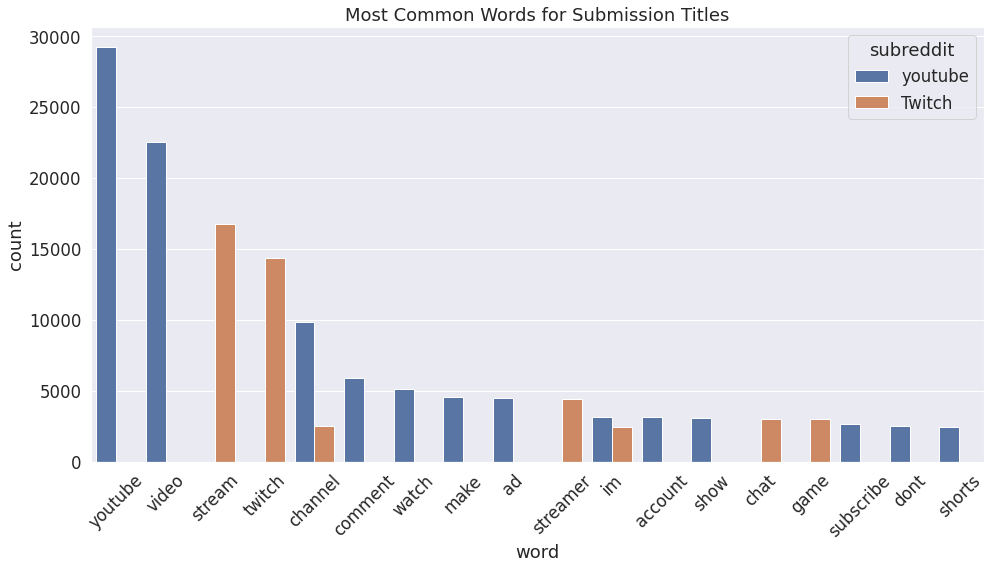

In [0]:
mcw_df_title = result_mcw.limit(20).toPandas()
plt.figure(figsize=(16, 8))
sns.set(font_scale=1.5)
sns.barplot(data=mcw_df_title, x="word", y="count", hue="subreddit").set(title='Most Common Words for Submission Titles')
plt.xticks(rotation=45)
plt.show()

The most common words (except thier name) for titles are video and stream. Essentially Twitch is a live streaming platform and youtube is a video sharing platform. Therefore the most comment word for Twitch is "stream" and for youtube is "video". Twitch is focus on the quality of live streaming, and youtube is more concerned about the quality of videos uploaded by users.

In [0]:
result2, output_colname2 = nlp_pipline("selftext", submissions_nona, tokenize=True, normalize=True, lemmatize=True, stopwords=True, vivekn=False, Word2Vec=False, finisher=False, embed_finisher=False)
result2.selectExpr(str(output_colname2) + ".result").show(truncate=True)

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]
+--------------------+
|              result|
+--------------------+
|[time, stream, wa...|
|                  []|
|                  []|
|[streamlabs, aler...|
|[edit, vods, smal...|
|                  []|
|                  []|
|[gf, start, strea...|
|[hey, guy, time, ...|
|[twitch, emote, b...|
|                  []|
|[good, describe, ...|
|[im, editor, surp...|
|[im, buy, stream,...|
|[hey, guy, ive, r...|
|[guy, ive, stream...|
|                  []|
|[hey, lot, delete...|
|[twitch, payout, ...|
|[guy, start, stre...|
+--------------------+
only showing top 20 rows



In [0]:
result_text_mcw = result2.withColumn('word', f.explode(f.col(str(output_colname2) + ".result"))).groupBy('subreddit', 'word').count().sort('count', ascending=False)
result_text_mcw.show(truncate=False)

+---------+--------+-----+
|subreddit|word    |count|
+---------+--------+-----+
|Twitch   |stream  |50868|
|youtube  |video   |33586|
|Twitch   |im      |25464|
|youtube  |youtube |22797|
|youtube  |delete  |22620|
|Twitch   |twitch  |22518|
|Twitch   |game    |13983|
|Twitch   |delete  |13132|
|Twitch   |ive     |12737|
|Twitch   |dont    |11864|
|Twitch   |streamer|11413|
|youtube  |channel |11325|
|Twitch   |make    |11147|
|Twitch   |time    |10232|
|Twitch   |people  |9974 |
|Twitch   |chat    |9069 |
|Twitch   |play    |9056 |
|Twitch   |work    |8855 |
|youtube  |im      |8647 |
|youtube  |watch   |8387 |
+---------+--------+-----+
only showing top 20 rows



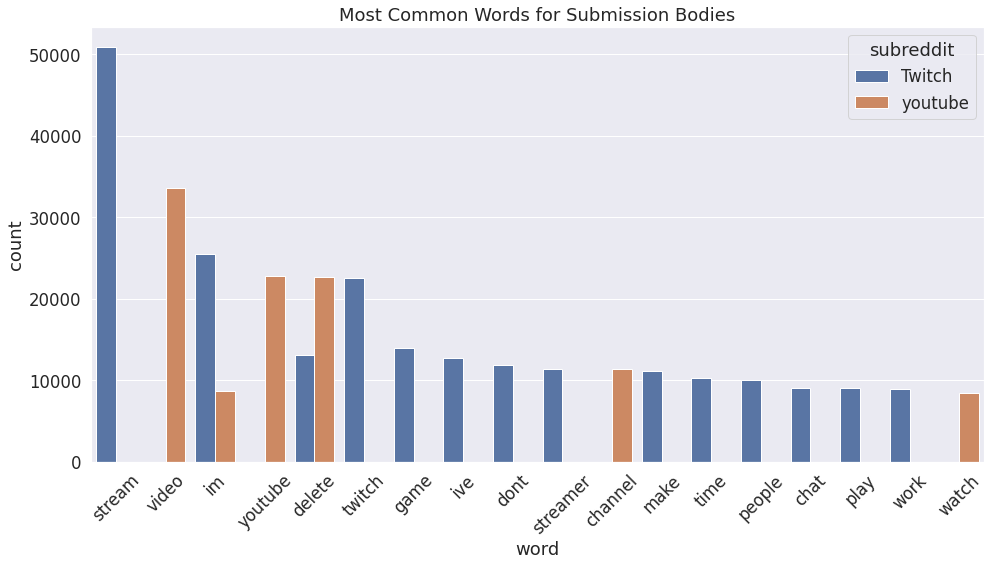

In [0]:
mcw_df_text = result_text_mcw.limit(20).toPandas()
plt.figure(figsize=(16, 8))
sns.set(font_scale=1.5)
sns.barplot(data=mcw_df_text, x="word", y="count", hue="subreddit").set(title='Most Common Words for Submission Bodies')
plt.xticks(rotation=45)
plt.show()

The most common word for the body of submission are "stream" and "video" seperately, which are same as the most common word for title.

### Most common words for comments

In [0]:
result_comments, colname_comments = nlp_pipline("body", comments_nona, tokenize=True, normalize=True, lemmatize=True, stopwords=True, finisher=False)
result_comments.selectExpr(str(colname_comments) + ".result").show(truncate=False)

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]
+-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|result                                                                                                                                                                                                                                     

In [0]:
result_comments_mcw = result_comments.withColumn('word', f.explode(f.col(str(colname_comments) + ".result"))).groupBy('subreddit', 'word').count().sort('count', ascending=False)
result_comments_mcw.show(truncate=False)

+---------+---------------------------------+------+
|subreddit|word                             |count |
+---------+---------------------------------+------+
|youtube  |post                             |255044|
|youtube  |question                         |217671|
|Twitch   |stream                           |198588|
|youtube  |youtube                          |178692|
|youtube  |channel                          |170614|
|youtube  |bot                              |156302|
|youtube  |contact                          |143290|
|youtube  |action                           |130681|
|youtube  |automatically                    |128291|
|Twitch   |dont                             |128219|
|youtube  |perform                          |126200|
|youtube  |moderator                        |125692|
|youtube  |concern                          |125598|
|youtube  |subredditmessagecomposetoryoutube|125268|
|youtube  |video                            |119062|
|Twitch   |rule                             |1

In [0]:
result_comments_mcw.where(f.col("subreddit") == "youtube").show(10)

+---------+-------------+------+
|subreddit|         word| count|
+---------+-------------+------+
|  youtube|         post|255044|
|  youtube|     question|217671|
|  youtube|      youtube|178692|
|  youtube|      channel|170614|
|  youtube|          bot|156302|
|  youtube|      contact|143290|
|  youtube|       action|130681|
|  youtube|automatically|128291|
|  youtube|      perform|126200|
|  youtube|    moderator|125692|
+---------+-------------+------+
only showing top 10 rows



In [0]:
result_comments_mcw.where(f.col("subreddit") == "Twitch").show(10)

+---------+---------+------+
|subreddit|     word| count|
+---------+---------+------+
|   Twitch|   stream|198588|
|   Twitch|     dont|128219|
|   Twitch|     rule|116009|
|   Twitch|   twitch|108745|
|   Twitch|     post|104711|
|   Twitch|   people| 99287|
|   Twitch|     make| 83253|
|   Twitch|       im| 78332|
|   Twitch| streamer| 76487|
|   Twitch|subreddit| 71345|
+---------+---------+------+
only showing top 10 rows



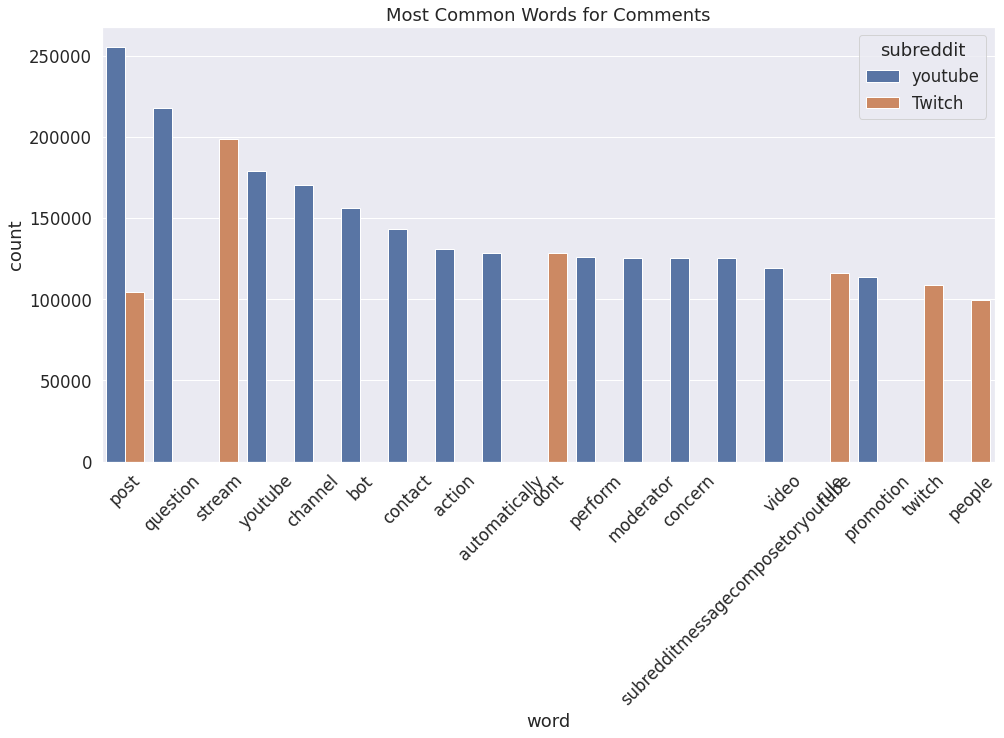

In [0]:
mcw_df_body = result_comments_mcw.limit(20).toPandas()
plt.figure(figsize=(16, 8))
sns.set(font_scale=1.3)
sns.barplot(data=mcw_df_body, x="word", y="count", hue="subreddit").set(title='Most Common Words for Comments')
plt.xticks(rotation=45)
plt.show()

### What is the distribution of text lengths?

In [0]:
submissions_nona.show(5)

In [0]:
number_text = submissions_new.groupby('len_title').count()
## order by len_title
number_text.orderBy(col("len_title").asc(),col("count").asc()).show(truncate=False)

+---------+-----+
|len_title|count|
+---------+-----+
|1        |225  |
|2        |268  |
|3        |750  |
|4        |1164 |
|5        |851  |
|6        |1108 |
|7        |1192 |
|8        |1319 |
|9        |1802 |
|10       |1717 |
|11       |2215 |
|12       |2399 |
|13       |2464 |
|14       |2846 |
|15       |2977 |
|16       |3021 |
|17       |16360|
|18       |3412 |
|19       |3365 |
|20       |3501 |
+---------+-----+
only showing top 20 rows



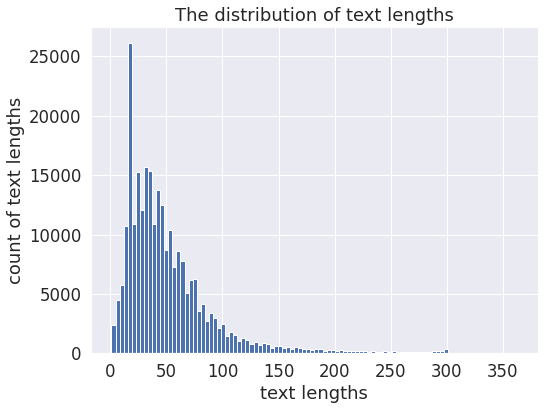

In [0]:
bins, counts = submissions_new.select('len_title').rdd.flatMap(lambda x: x).histogram(100)
plt.figure(figsize=(8,6))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("The distribution of text lengths")
plt.ylabel("count of text lengths") 
plt.xlabel("text lengths") 
plt.show()

### Standard Pipeline

### What are important words according to TF-IDF?

In [0]:
documentAssembler = DocumentAssembler().setInputCol("title").setOutputCol("document")
tokenizer = Tokenizer().setInputCols(["document"]).setOutputCol("token").fit(submissions_nona)
normalizer = Normalizer().setInputCols(['token']).setOutputCol('normalized').setLowercase(True).setCleanupPatterns(["""[^\w\d\s]"""])  # Removes punctuations and special characters
lemmatizer = LemmatizerModel.pretrained().setInputCols(['normalized']).setOutputCol('lemma')
stopwords_cleaner = StopWordsCleaner().pretrained("stopwords_en", "en").setInputCols(['lemma']).setOutputCol('clean_lemma').setCaseSensitive(False)
finisher = Finisher().setInputCols(['clean_lemma']).setOutputCols('token_features').setCleanAnnotations(False).setOutputAsArray(True) 
# hashingTF = HashingTF(inputCol="token_features", outputCol="tf_features", numFeatures=100)
tf = CountVectorizer(inputCol='token_features', outputCol='tf_features')
idf = IDF(inputCol='tf_features', outputCol='tf_idf_features')

# explodeVectors = SQLTransformer(statement=
#       "SELECT EXPLODE(tf_idf_features) AS features")
explodeVectors = SQLTransformer(statement=
      "SELECT regexp_extract(tf_idf_features, r'\],\[(.*?)\]', 1) AS features, * FROM __THIS__")
pipeline = Pipeline().setStages([documentAssembler, tokenizer, normalizer, lemmatizer, stopwords_cleaner, finisher, tf, idf]).fit(submissions_nona)
tfidf_ytb = pipeline.transform(submissions_nona.where(f.col("subreddit") == "youtube"))
# res_tfidf, output_colnam_name = nlp_pipline("selftext", submissions_nona, tokenize=True, normalize=True, lemmatize=True, stopwords=True, vivekn=False, finisher=True)

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]


In [0]:
tfidf_twc = pipeline.transform(submissions_nona.where(f.col("subreddit") == "Twitch"))

In [0]:
# combine the result and score (contained in keywords.metadata)
#scores = result_tfidf \
#    .selectExpr(f"explode(arrays_zip(output6.result, output6.metadata)) as resultTuples") \
#    .selectExpr("resultTuples['0'] as keyword", "resultTuples['1'].score as score")

In [0]:
tfidf_ytb.select('tf_idf_features').show(5)

+--------------------+
|     tf_idf_features|
+--------------------+
|(55500,[25,61,66,...|
|(55500,[269,866],...|
|(55500,[0,7,76,88...|
|(55500,[242,31353...|
|(55500,[4,45,190,...|
+--------------------+
only showing top 5 rows



In [0]:
tfidf_ytb = tfidf_ytb.withColumn("tfidf_features",tfidf_ytb.tf_idf_features.cast('string'))
tfidf_twc = tfidf_twc.withColumn("tfidf_features",tfidf_twc.tf_idf_features.cast('string'))

In [0]:
tfidf_ytb.createOrReplaceTempView('tfidf_df_ytb')
tfidf_twc.createOrReplaceTempView('tfidf_df_twc')

In [0]:
result_importance_ytb = spark.sql(r'''
    SELECT
        regexp_extract(tfidf_features, r'\],\[(.*?)\]', 1) as features, token_features
    FROM tfidf_df_ytb
    ''')
result_importance_twc = spark.sql(r'''
    SELECT
        regexp_extract(tfidf_features, r'\],\[(.*?)\]', 1) as features, token_features
    FROM tfidf_df_twc
    ''')

In [0]:
from pyspark.ml.functions import array_to_vector
df_importance_ytb = result_importance_ytb.select(split(col("features"),",").alias("featureArray"), 'token_features')
df_importance_twc = result_importance_twc.select(split(col("features"),",").alias("featureArray"), 'token_features')

In [0]:
df_importance_ytb.show(5)

+--------------------+--------------------+
|        featureArray|      token_features|
+--------------------+--------------------+
|[8.31066736389341...|[green, screen, s...|
|[5.78614307837544...|[hell, advertisem...|
|[1.82057048047815...|[explain, song, 1...|
|[5.73001975416316...|     [stick, fight2]|
|[2.73631418086671...|[fortnite, montag...|
+--------------------+--------------------+
only showing top 5 rows



In [0]:
# combine the result and score (contained in keywords.metadata)
scores_ytb = df_importance_ytb.selectExpr(f"explode(arrays_zip(token_features, featureArray)) as resultTuples").selectExpr("resultTuples['token_features'] as words", "resultTuples['featureArray'] as score").withColumn("subreddit", f.lit("youtube"))
scores_twc = df_importance_twc.selectExpr(f"explode(arrays_zip(token_features, featureArray)) as resultTuples").selectExpr("resultTuples['token_features'] as words", "resultTuples['featureArray'] as score").withColumn("subreddit", f.lit("Twitch"))

In [0]:
# Ranked in decending order, as higher scores means higher importance
scores_ytb = scores_ytb.orderBy(col("score").desc())
scores_ytb.show(10, truncate = False)

+---------------+-----------------+---------+
|words          |score            |subreddit|
+---------------+-----------------+---------+
|fuck           |94.05641601944463|youtube  |
|sono           |9.992699631204475|youtube  |
|youtube        |9.992699631204475|youtube  |
|safe           |9.992699631204475|youtube  |
|de             |9.992699631204475|youtube  |
|cogwheelzahnrad|9.992699631204475|youtube  |
|kp             |9.992699631204475|youtube  |
|breath         |9.992699631204475|youtube  |
|nonvp9         |9.992699631204475|youtube  |
|roast          |9.992699631204475|youtube  |
+---------------+-----------------+---------+
only showing top 10 rows



From the TFIDF score we can see the F-word rules supreme in the Youtube subreddit. Adult contents are more prevalent in this subreddit compared to Twitch. Keywords include "video", "hotel", "meditation", "montage" clearly shows user preference and attention.

In [0]:
scores_twc = scores_twc.orderBy(col("score").desc())
scores_twc.show(10, truncate = False)

+-----------+-----------------+---------+
|words      |score            |subreddit|
+-----------+-----------------+---------+
|potty      |91.03195193859493|Twitch   |
|si         |9.992699631204475|Twitch   |
|videoaudio |9.992699631204475|Twitch   |
|sabotage   |9.992699631204475|Twitch   |
|athenascope|9.992699631204475|Twitch   |
|warfare    |9.992699631204475|Twitch   |
|irl        |9.992699631204475|Twitch   |
|1200       |9.992699631204475|Twitch   |
|stream     |9.992699631204475|Twitch   |
|multiplayer|9.992699631204475|Twitch   |
+-----------+-----------------+---------+
only showing top 10 rows



In [0]:
tfidf_all = scores_ytb.union(scores_twc).orderBy(col("score").desc())

In [0]:
tfidf_all_plot = tfidf_all.limit(20).toPandas().astype({'score':'float'})
tfidf_all_plot

,words,score,subreddit
0,fuck,94.056416,youtube
1,potty,91.031952,Twitch
2,roast,9.992700,youtube
3,comeback,9.992700,youtube
4,safe,9.992700,youtube
5,breath,9.992700,youtube
6,member,9.992700,youtube
7,party,9.992700,youtube
8,view,9.992700,youtube
9,ross,9.992700,youtube


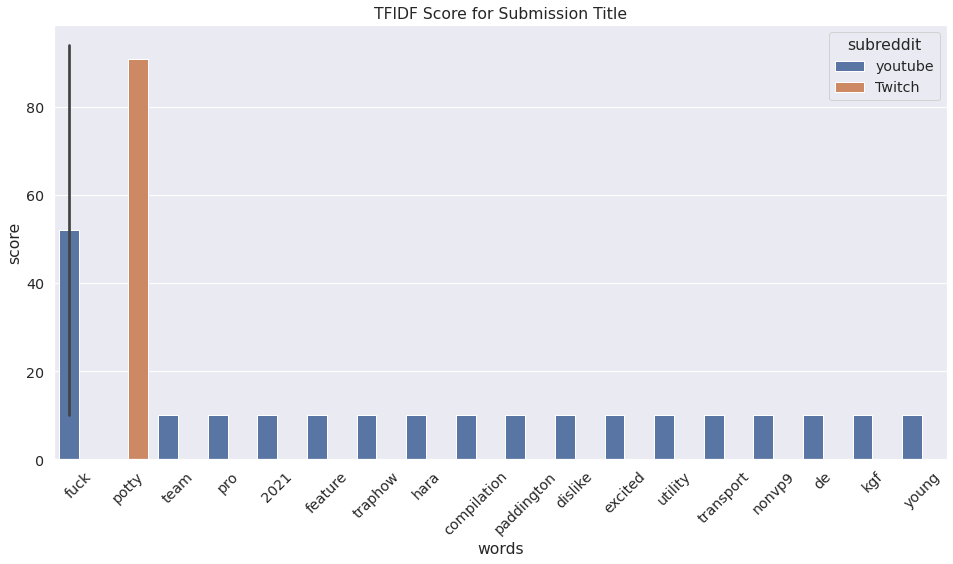

In [0]:
plt.figure(figsize=(16, 8))
sns.set(font_scale=1.3)
sns.barplot(data=tfidf_all_plot, x="words", y="score", hue="subreddit").set(title='TFIDF Score for Submission Title')
plt.xticks(rotation=45)
plt.show()

Twitch subreddit users clearly pays more attention to technical contents and interaction with other users. Several trending twitch channel made it in the top of this list.

## Identify important keywords for your reddit data and use regex searches to create at least two dummy variables to identify comments of particular topics.

In [0]:
from pyspark.sql.functions import when
comments_nona_dummy = comments_nona.withColumn('ads_dummy', when(col("body").rlike("ads|advertis|sponsor"), 1).otherwise(0))
comments_nona_dummy.groupby("subreddit", "ads_dummy").count().show()

+---------+---------+------+
|subreddit|ads_dummy| count|
+---------+---------+------+
|   Twitch|        0|505183|
|   Twitch|        1| 38876|
|  youtube|        0|347645|
|  youtube|        1| 57079|
+---------+---------+------+



In [0]:
# comments_nona_dummy = comments_nona.withColumn('error_dummy', when(col("body").rlike("crash|sound|speed|cookies|quality|corrupt|error|wrong"), 1).otherwise(0))

comments_nona_dummy = comments_nona.withColumn("error_dummy", when(col("body").rlike("crash|corrupt|collapse"),"crash/corrupt")
                                 .when(col("body").rlike("(no|echo|miss|delay).*(sound|audio)"),"audio")
                                 .when(col("body").rlike("speed|wait.*buffer"),"speed")
                                 .when(col("body").rlike("(low|bad).*quality"),"quality")
                                 .when(col("body").rlike("ads|advertis|sponsor"),"ads")
                                 .when(col("body").rlike("cookies"),"cookies")
                                 .otherwise("normal"))

comments_error_df = comments_nona_dummy.groupby("subreddit", "error_dummy").count().orderBy(col("subreddit").asc(),col("count").desc()).cache().toPandas()

In [0]:
comments_error_df

,subreddit,error_dummy,count
0,Twitch,normal,493701
1,Twitch,ads,38036
2,Twitch,audio,6647
3,Twitch,speed,3267
4,Twitch,quality,1070
5,Twitch,crash/corrupt,987
6,Twitch,cookies,351
7,youtube,normal,344864
8,youtube,ads,56863
9,youtube,cookies,735


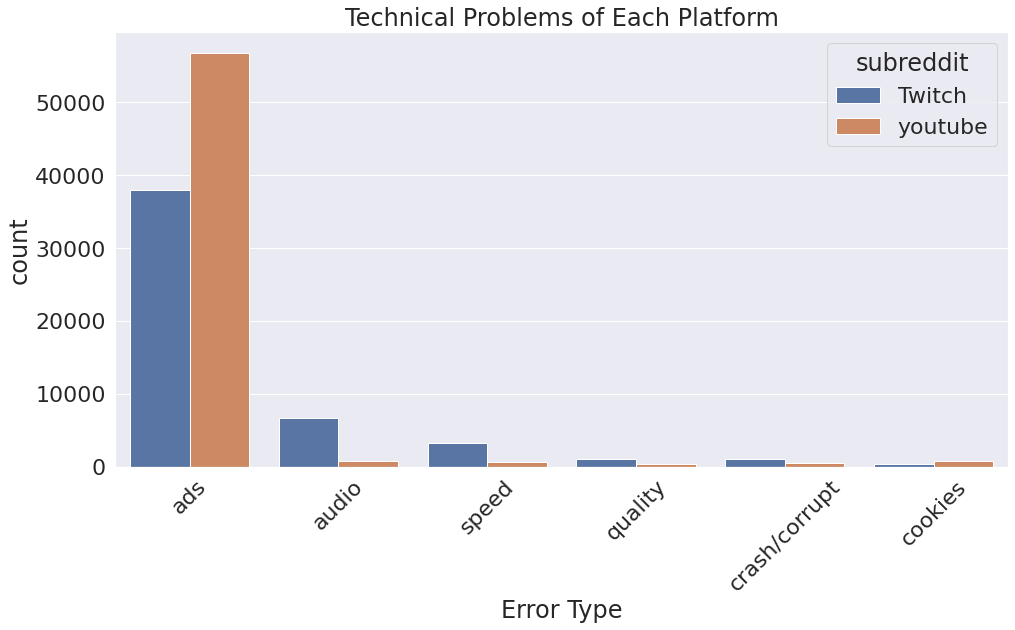

In [0]:
comments_error_df2 = comments_error_df[comments_error_df['error_dummy']!="normal"]
plt.figure(figsize=(16, 8))
sns.set(font_scale=2)
sns.barplot(data=comments_error_df2, x="error_dummy", y="count", hue="subreddit").set(title='Technical Problems of Each Platform', xlabel='Error Type')
plt.xticks(rotation=45)
plt.show()

## sentiment model
Build at least one sentiment model using the sparkNLP framework. Pick a pre-trained model or train your model! You can start off with simple pos/neg/neu sentiment. Maybe you will want to build your own textual classification model.... that is completely up to you and your topical interests and technical goals. You must report a table of summary statistics from any model(s) leveraged.

In [0]:
## Sentiment Analysis (Vivekn Model) 
## reference link of Vivekn Sentiment Approach: https://nlp.johnsnowlabs.com/2021/11/22/sentiment_vivekn_en.html
import sparknlp
from sparknlp.base import *
from sparknlp.annotator import *
from pyspark.ml import Pipeline
from pyspark.sql.functions import *

In [0]:
#Sentiment Analysis on "submissions"   
sentiment_result_submissions, sentiment_colname_submissions = nlp_pipline("title", submissions_nona, tokenize=True, normalize=True, lemmatize=True, stopwords=True, vivekn=True, Word2Vec=False, finisher=True, embed_finisher=False)
sentiment_result_submissions = sentiment_result_submissions.select(col(sentiment_colname_submissions).alias("final_sentiment_submissions"), "subreddit","score_dummy","title_dummy","over_18","is_self")
sentiment_result_submissions.show(truncate=False)

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]
sentiment_vivekn download started this may take some time.
Approximate size to download 873.6 KB
[OK!]
+---------------------------+---------+-----------+-----------+-------+-------+
|final_sentiment_submissions|subreddit|score_dummy|title_dummy|over_18|is_self|
+---------------------------+---------+-----------+-----------+-------+-------+
|[positive]                 |Twitch   |1          |0          |false  |true   |
|[positive]                 |Twitch   |1          |0          |false  |false  |
|[na]                       |Twitch   |0          |0          |false  |false  |
|[positive]                 |Twitch   |1          |0          |false  |true   |
|[na]                       |Twitch   |1          |0          |false  |true   |
|[positive]                 |Twitch   |0          |0         

In [0]:
#Sentiment Analysis on "comments"   
sentiment_result_comments, sentiment_colname_comments = nlp_pipline("body", comments_nona, tokenize=True, normalize=True, lemmatize=True, stopwords=True, vivekn=True, Word2Vec=False, finisher=True, embed_finisher=False)
sentiment_result_comments = sentiment_result_comments.select(col(sentiment_colname_comments).alias("final_sentiment_comments"),"subreddit", "score")
sentiment_result_comments.show(truncate=False)

lemma_antbnc download started this may take some time.
Approximate size to download 907.6 KB
[OK!]
stopwords_en download started this may take some time.
Approximate size to download 2.9 KB
[OK!]
sentiment_vivekn download started this may take some time.
Approximate size to download 873.6 KB
[OK!]
+------------------------+---------+-----+
|final_sentiment_comments|subreddit|score|
+------------------------+---------+-----+
|[negative]              |youtube  |-10  |
|[negative]              |youtube  |11   |
|[positive]              |youtube  |1    |
|[na]                    |youtube  |3    |
|[positive]              |youtube  |1    |
|[na]                    |youtube  |3    |
|[positive]              |youtube  |3    |
|[negative]              |youtube  |21   |
|[positive]              |youtube  |1    |
|[positive]              |youtube  |29   |
|[negative]              |youtube  |-23  |
|[negative]              |youtube  |1    |
|[positive]              |youtube  |1    |
|[negative]  

# 3 graphs, 3 tables

### Sentiment Analysis on "submissions"

In [0]:
## summary statistics table for youtube subreddit:
sentiment1_youtube = sentiment_result_submissions.select("final_sentiment_submissions", "subreddit","score_dummy","title_dummy").where(f.col("subreddit") == "youtube")

sentiment1_youtube.summary().show() 

+-------+---------+------------------+------------------+
|summary|subreddit|       score_dummy|       title_dummy|
+-------+---------+------------------+------------------+
|  count|   106895|            106895|            106895|
|   mean|     null|0.8378689368071472|0.2848402638102811|
| stddev|     null|0.3685727233196916|0.4513404409176384|
|    min|  youtube|                 0|                 0|
|    25%|     null|                 1|                 0|
|    50%|     null|                 1|                 0|
|    75%|     null|                 1|                 1|
|    max|  youtube|                 1|                 1|
+-------+---------+------------------+------------------+



In [0]:
## summary statistics table for Twitch subreddit:
sentiment1_twitch = sentiment_result_submissions.select("final_sentiment_submissions","subreddit","score_dummy","title_dummy").where(f.col("subreddit") == "Twitch")
sentiment1_twitch.summary().show()

+-------+---------+------------------+------------------+
|summary|subreddit|       score_dummy|       title_dummy|
+-------+---------+------------------+------------------+
|  count|    68034|             68034|             68034|
|   mean|     null|0.6880824293735485| 0.364714701472793|
| stddev|     null|0.4632797799170321|0.4813536056492516|
|    min|   Twitch|                 0|                 0|
|    25%|     null|                 0|                 0|
|    50%|     null|                 1|                 0|
|    75%|     null|                 1|                 1|
|    max|   Twitch|                 1|                 1|
+-------+---------+------------------+------------------+



We can see from the tables above that on average Twitch subreddit's submissions enjoys more upvotes and are more likely to contain a question compared to youtube subreddit.

In [0]:
sentiment_result_submissions.stat.crosstab("score_dummy","title_dummy").show() 

+-----------------------+-----+-----+
|score_dummy_title_dummy|    0|    1|
+-----------------------+-----+-----+
|                      1|96307|40070|
|                      0|23361|15191|
+-----------------------+-----+-----+



In [0]:
## Youtube: summary of Cross Tabulation (Contingency Table): 
model1_contingency = sentiment1_youtube.stat.crosstab("score_dummy","final_sentiment_submissions")
model1_contingency.show() 
sentiment_result_table_youtube = model1_contingency.cache().toPandas()


## Twitch: summary of Cross Tabulation (Contingency Table): 
model1_contingency = sentiment1_twitch.stat.crosstab("score_dummy","final_sentiment_submissions")
model1_contingency.show() 
sentiment_result_table_twitch = model1_contingency.cache().toPandas()

+---------------------------------------+--------------+----------------+----------------------+----------------------+
|score_dummy_final_sentiment_submissions|WrappedArray()|WrappedArray(na)|WrappedArray(negative)|WrappedArray(positive)|
+---------------------------------------+--------------+----------------+----------------------+----------------------+
|                                      1|          1741|           27753|                 31257|                 28813|
|                                      0|           365|            5711|                  6138|                  5117|
+---------------------------------------+--------------+----------------+----------------------+----------------------+

+---------------------------------------+--------------+----------------+----------------------+----------------------+
|score_dummy_final_sentiment_submissions|WrappedArray()|WrappedArray(na)|WrappedArray(negative)|WrappedArray(positive)|
+--------------------------------------

<Figure size 720x576 with 0 Axes>

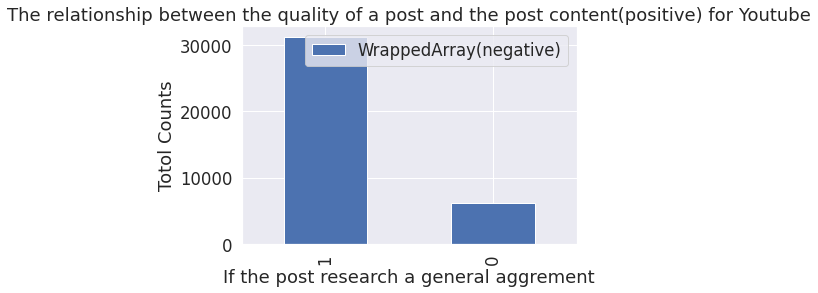

<Figure size 720x576 with 0 Axes>

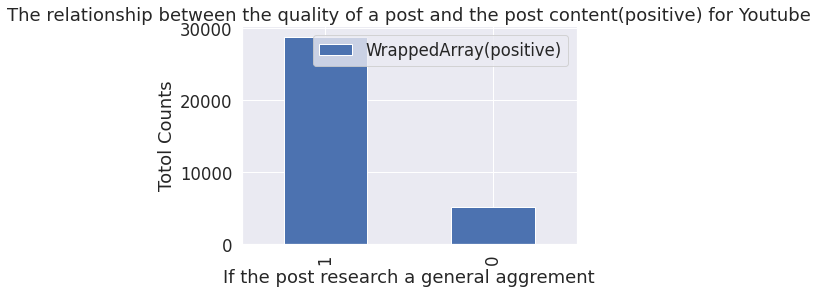

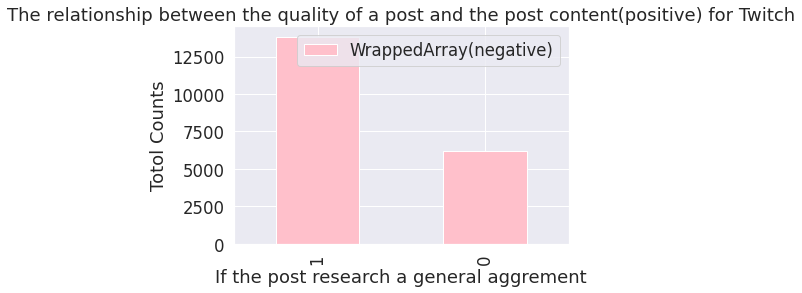

<Figure size 720x576 with 0 Axes>

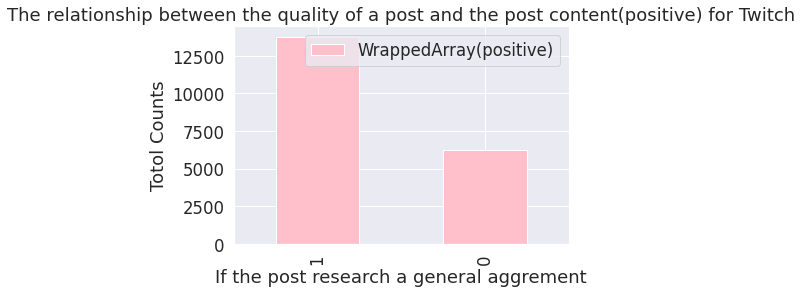

In [0]:
plt.figure(figsize=(10, 8))
sentiment_result_table_youtube.plot.bar(x='score_dummy_final_sentiment_submissions', y='WrappedArray(negative)' )
plt.title("The relationship between the quality of a post and the post content(positive) for Youtube")
plt.xlabel("If the post research a general aggrement") 
plt.ylabel("Totol Counts")

plt.figure(figsize=(10, 8))
sentiment_result_table_youtube.plot.bar(x='score_dummy_final_sentiment_submissions', y='WrappedArray(positive)' )
plt.title("The relationship between the quality of a post and the post content(positive) for Youtube")
plt.xlabel("If the post research a general aggrement") 
plt.ylabel("Totol Counts")

plt.show()

sentiment_result_table_twitch.plot.bar(x='score_dummy_final_sentiment_submissions', y='WrappedArray(negative)',color="pink" )
plt.title("The relationship between the quality of a post and the post content(positive) for Twitch")
plt.xlabel("If the post research a general aggrement") 
plt.ylabel("Totol Counts")

plt.figure(figsize=(10, 8))
sentiment_result_table_twitch.plot.bar(x='score_dummy_final_sentiment_submissions', y='WrappedArray(positive)',color="pink" )
plt.title("The relationship between the quality of a post and the post content(positive) for Twitch")
plt.xlabel("If the post research a general aggrement") 
plt.ylabel("Totol Counts")

plt.show()



In [0]:
## Youtube: summary of Cross Tabulation (Contingency Table): 
model1_contingency2 = sentiment1_youtube.stat.crosstab("title_dummy","final_sentiment_submissions") 
model1_contingency2.show() 
sentiment_youtube_table2 = model1_contingency2.cache().toPandas()


## Twitch: summary of Cross Tabulation (Contingency Table): 
model1_contingency2 = sentiment1_twitch.stat.crosstab("title_dummy","final_sentiment_submissions") 
model1_contingency2.show() 
sentiment_twitch_table2 = model1_contingency2.cache().toPandas()

+---------------------------------------+--------------+----------------+----------------------+----------------------+
|title_dummy_final_sentiment_submissions|WrappedArray()|WrappedArray(na)|WrappedArray(negative)|WrappedArray(positive)|
+---------------------------------------+--------------+----------------+----------------------+----------------------+
|                                      1|           578|            8507|                 11462|                  9901|
|                                      0|          1528|           24957|                 25933|                 24029|
+---------------------------------------+--------------+----------------+----------------------+----------------------+

+---------------------------------------+--------------+----------------+----------------------+----------------------+
|title_dummy_final_sentiment_submissions|WrappedArray()|WrappedArray(na)|WrappedArray(negative)|WrappedArray(positive)|
+--------------------------------------

<Figure size 720x576 with 0 Axes>

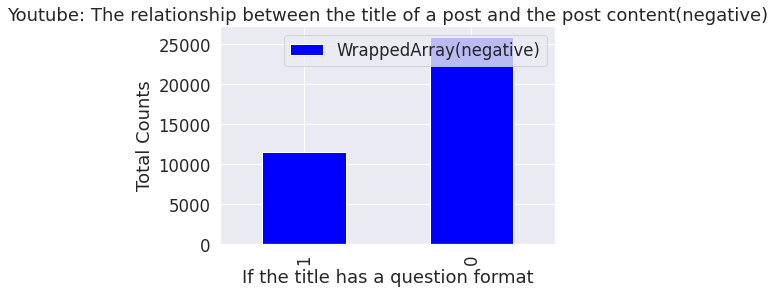

<Figure size 720x576 with 0 Axes>

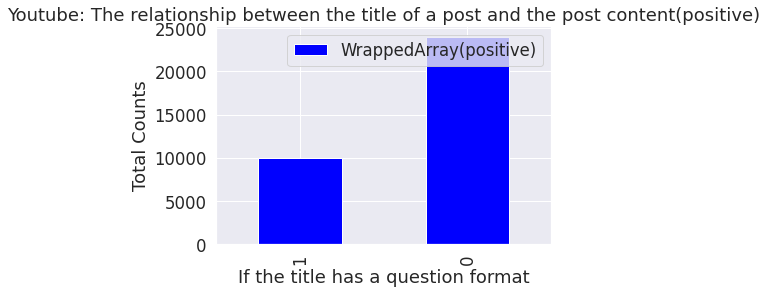

<Figure size 720x576 with 0 Axes>

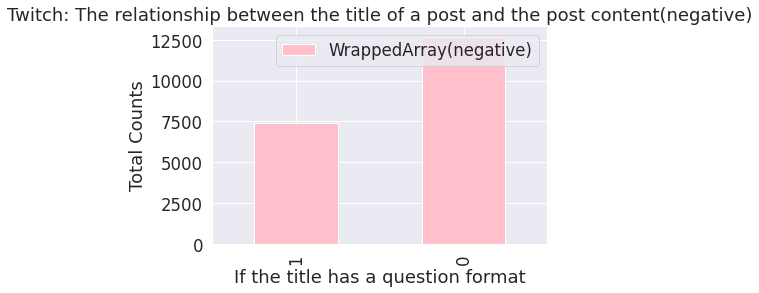

<Figure size 720x576 with 0 Axes>

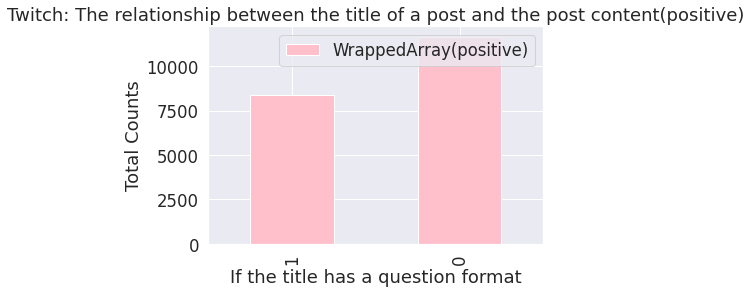

In [0]:
## youtube

plt.figure(figsize=(10, 8))
sentiment_youtube_table2.plot.bar(x='title_dummy_final_sentiment_submissions', y='WrappedArray(negative)',color="blue" )
plt.title("Youtube: The relationship between the title of a post and the post content(negative)")
plt.xlabel("If the title has a question format") 
plt.ylabel("Total Counts")

plt.figure(figsize=(10, 8))
sentiment_youtube_table2.plot.bar(x='title_dummy_final_sentiment_submissions', y='WrappedArray(positive)' ,color="blue" )
plt.title("Youtube: The relationship between the title of a post and the post content(positive)")
plt.xlabel("If the title has a question format") 
plt.ylabel("Total Counts")
plt.show() 

## twitch 

plt.figure(figsize=(10, 8))
sentiment_twitch_table2.plot.bar(x='title_dummy_final_sentiment_submissions', y='WrappedArray(negative)',color="pink" )
plt.title("Twitch: The relationship between the title of a post and the post content(negative)")
plt.xlabel("If the title has a question format") 
plt.ylabel("Total Counts")


plt.figure(figsize=(10, 8))
sentiment_twitch_table2.plot.bar(x='title_dummy_final_sentiment_submissions', y='WrappedArray(positive)' ,color="pink" )
plt.title("Twitch: The relationship between the title of a post and the post content(positive)")
plt.xlabel("If the title has a question format") 
plt.ylabel("Total Counts")
plt.show() 

### Sentiment Analysis on "comments"

In [0]:
## summary statistics table :
sentiment_result_comments.select("final_sentiment_comments","score").summary().show()

+-------+------------------+
|summary|             score|
+-------+------------------+
|  count|            948783|
|   mean|3.1296228958571137|
| stddev| 16.49752509313953|
|    min|              -366|
|    25%|                 1|
|    50%|                 1|
|    75%|                 2|
|    max|              2353|
+-------+------------------+



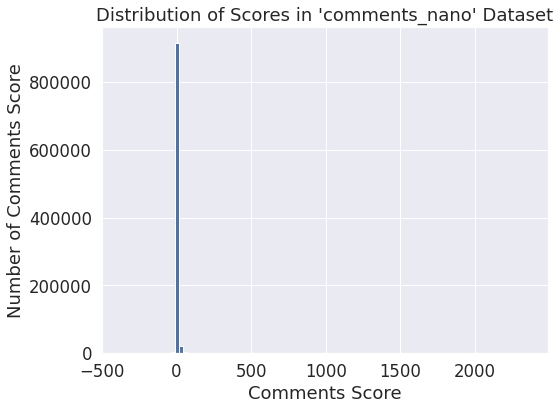

In [0]:
sentiment_result_comments = sentiment_result_comments.sort("score")
bins, counts = sentiment_result_comments.select('score').rdd.flatMap(lambda x: x).histogram(100) #divided into 100 groups
plt.figure(figsize=(8,6))
plt.hist(bins[:-1], bins=bins, weights=counts)
plt.title("Distribution of Scores in 'comments_nano' Dataset")
plt.xlabel("Comments Score") 
plt.ylabel("Number of Comments Score")
plt.show()

In [0]:
#Based on the previous table and Visualization, we decided to separate the dataset into three parts: score below 0, score equal to 0 and score over 0.
comments_score_below = sentiment_result_comments.filter(sentiment_result_comments.score < 0)
comments_score_equal = sentiment_result_comments.filter(sentiment_result_comments.score == 0)
comments_score_over = sentiment_result_comments.filter(sentiment_result_comments.score > 0)

In [0]:
comments_score_below_gb = comments_score_below.groupby('final_sentiment_comments','subreddit').count().sort("subreddit").cache()
comments_score_below_gb.toPandas()

,final_sentiment_comments,subreddit,count
0,[],Twitch,523
1,[positive],Twitch,8749
2,[negative],Twitch,8004
3,[na],Twitch,2787
4,[positive],youtube,4025
5,[],youtube,307
6,[negative],youtube,3263
7,[na],youtube,1545


In [0]:
comments_score_equal_gb = comments_score_equal.groupby('final_sentiment_comments','subreddit').count().sort("subreddit").cache()
comments_score_equal_gb.toPandas()

,final_sentiment_comments,subreddit,count
0,[negative],Twitch,9105
1,[],Twitch,751
2,[positive],Twitch,10893
3,[na],Twitch,3393
4,[],youtube,794
5,[negative],youtube,5919
6,[na],youtube,2992
7,[positive],youtube,8167


In [0]:
comments_score_over_gb = comments_score_over.groupby('final_sentiment_comments','subreddit').count().sort("subreddit").cache()
comments_score_over_gb.toPandas()

,final_sentiment_comments,subreddit,count
0,[na],Twitch,57715
1,[positive],Twitch,254604
2,[],Twitch,11427
3,[negative],Twitch,176108
4,[positive],youtube,194019
5,[],youtube,10408
6,[na],youtube,47488
7,[negative],youtube,125797


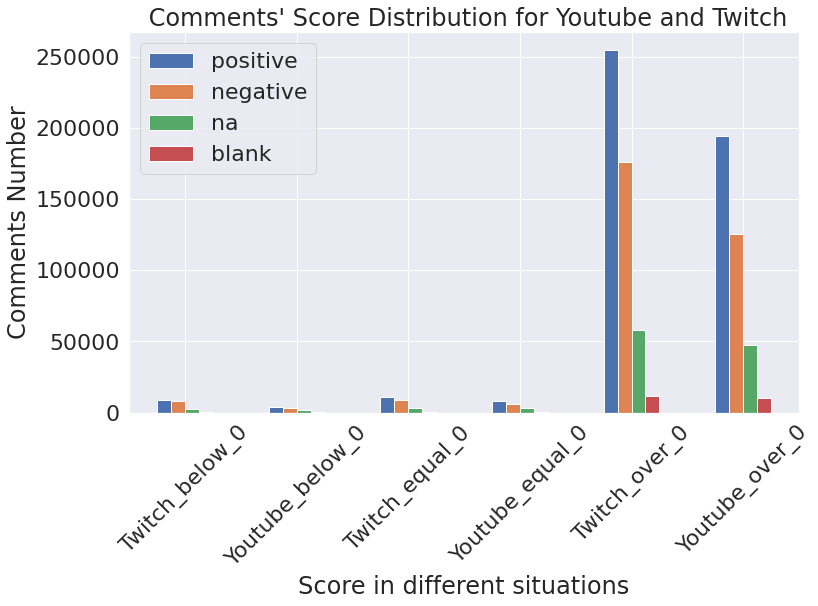

In [0]:
#https://spark.apache.org/docs/latest/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.bar.html
positive = [8749, 4025, 10893, 8167, 254604, 194019]
negative = [8004, 3263, 9105, 5919, 176108, 125797]
na = [2787, 1545, 3393, 2992, 57715, 47488]
blank = [523, 307, 751, 794, 11427, 10408]
index = ['Twitch_below_0', 'Youtube_below_0', 'Twitch_equal_0', 'Youtube_equal_0', 'Twitch_over_0', 'Youtube_over_0']
df = pd.DataFrame({'positive': positive,
                   'negative': negative,
                   'na':na,
                   'blank':blank}, index=index)

ax = df.plot.bar(title=" Comments' Score Distribution for Youtube and Twitch", figsize=(12, 7))
ax.set_xlabel("Score in different situations")
ax.set_ylabel("Comments Number")
plt.xticks(rotation=45)
fig.show()

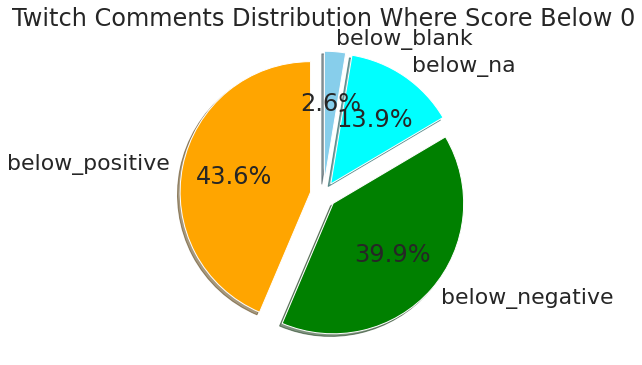

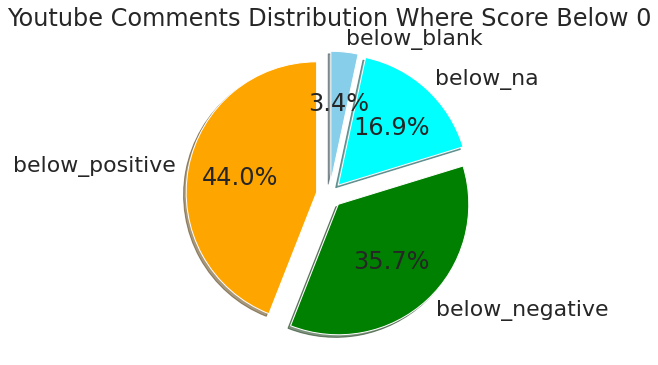

In [0]:
data = {'below_positive':8749,
        'below_negative':8004,
        'below_na':2787,
        'below_blank':523,}
colors = ['orange', 'green', 'cyan', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1)
plt.figure(figsize=(6, 6))
plt.pie(list(data.values()), explode=explode, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.title("Twitch Comments Distribution Where Score Below 0")
plt.show()

data = {'below_positive':4025,
        'below_negative':3263,
        'below_na':1545,
        'below_blank':307,}
colors = ['orange', 'green', 'cyan', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1) 
plt.figure(figsize=(6, 6))
plt.pie(list(data.values()), explode=explode, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.title("Youtube Comments Distribution Where Score Below 0")
plt.show()


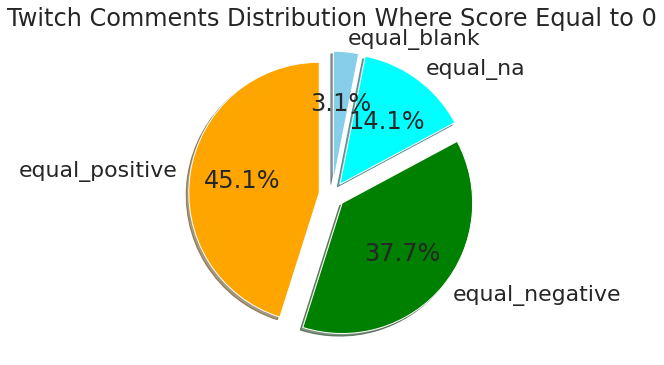

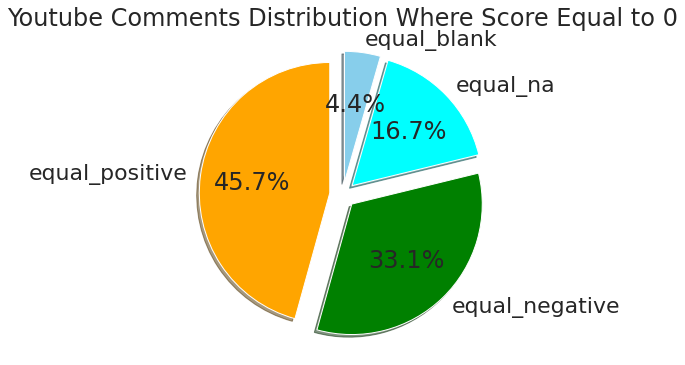

In [0]:
data = {'equal_positive':10893,
        'equal_negative':9105,
        'equal_na':3393,
        'equal_blank':751,}
colors = ['orange', 'green', 'cyan', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1) 
plt.figure(figsize=(6, 6))
plt.pie(list(data.values()), explode=explode, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.title("Twitch Comments Distribution Where Score Equal to 0")
plt.show()

data = {'equal_positive':8167,
        'equal_negative':5919,
        'equal_na':2992,
        'equal_blank':794,}
colors = ['orange', 'green', 'cyan', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1) 
plt.figure(figsize=(6, 6))
plt.pie(list(data.values()), explode=explode, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.title("Youtube Comments Distribution Where Score Equal to 0")
plt.show()


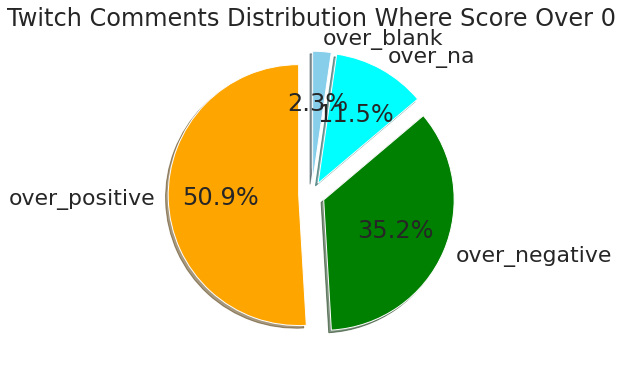

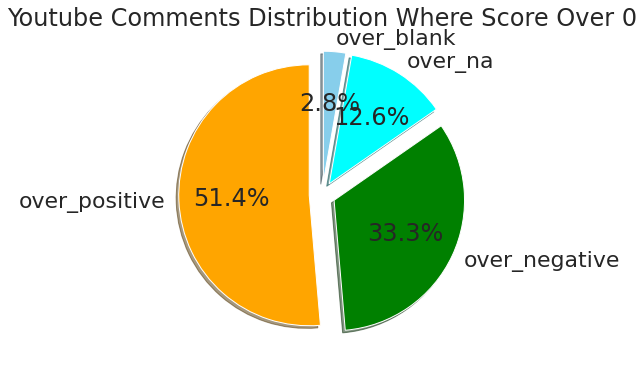

In [0]:
data = {'over_positive':254604,
        'over_negative':176108,
        'over_na':57715,
        'over_blank':11427,}
colors = ['orange', 'green', 'cyan', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1) 
plt.figure(figsize=(6, 6))
plt.pie(list(data.values()), explode=explode, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.title("Twitch Comments Distribution Where Score Over 0")
plt.show()

data = {'over_positive':194019,
        'over_negative':125797,
        'over_na':47488,
        'over_blank':10408,}
colors = ['orange', 'green', 'cyan', 'skyblue']
explode = (0.1, 0.1, 0.1, 0.1) 
plt.figure(figsize=(6, 6))
plt.pie(list(data.values()), explode=explode, labels=data.keys(), colors=colors, autopct='%2.1f%%', shadow=True, startangle=90)
plt.title("Youtube Comments Distribution Where Score Over 0")
plt.show()